In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Image Label : 5


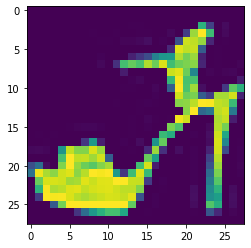

In [6]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7241 - accuracy: 0.7590 - val_loss: 0.5074 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4866 - accuracy: 0.8313 - val_loss: 0.4930 - val_accuracy: 0.8240
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8459 - val_loss: 0.4300 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4131 - accuracy: 0.8542 - val_loss: 0.3977 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3928 - accuracy: 0.8618 - val_loss: 0.3852 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.3666 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3631 - accuracy: 0.8725 - val_loss: 0.3931 - val_accuracy:

In [11]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 55ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [12]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
